<a href="https://colab.research.google.com/github/ke-wen/ke-wen/blob/main/python_ca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

**Gender Classification Dataset**


Analyze the appearance characteristics of men and women

https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

Content
This dataset contains 7 features and a label column.

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".                       
forehead_width_cm - This column is in CM's. This is the width of the forehead.                       
forehead_height_cm - This is the height of the forehead and it's in Cm's.                       
nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".                       
nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".                       
lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".                       
distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".                       

gender - This is either "Male" or "Female".      
I change male to 0 female to 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Analysis purpose:Analyze the characteristics of men and women through decision trees

In [ ]:
data_url='https://raw.githubusercontent.com/ke-wen/ke-wen/main/dataset/gender.csv'

data = pd.read_csv(data_url, header=0)

data.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


The provider of the data set has indicated that there is no missing data in the data set, so there is no need to preprocess the data

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


The label of this data set is gender, so x is all data except gender, and y is gender data

In [ ]:
X = data.drop('gender', 1)
y = data['gender'].values
print(X)
print(y)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

<ipython-input-4-99567def07b2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('gender', 1)


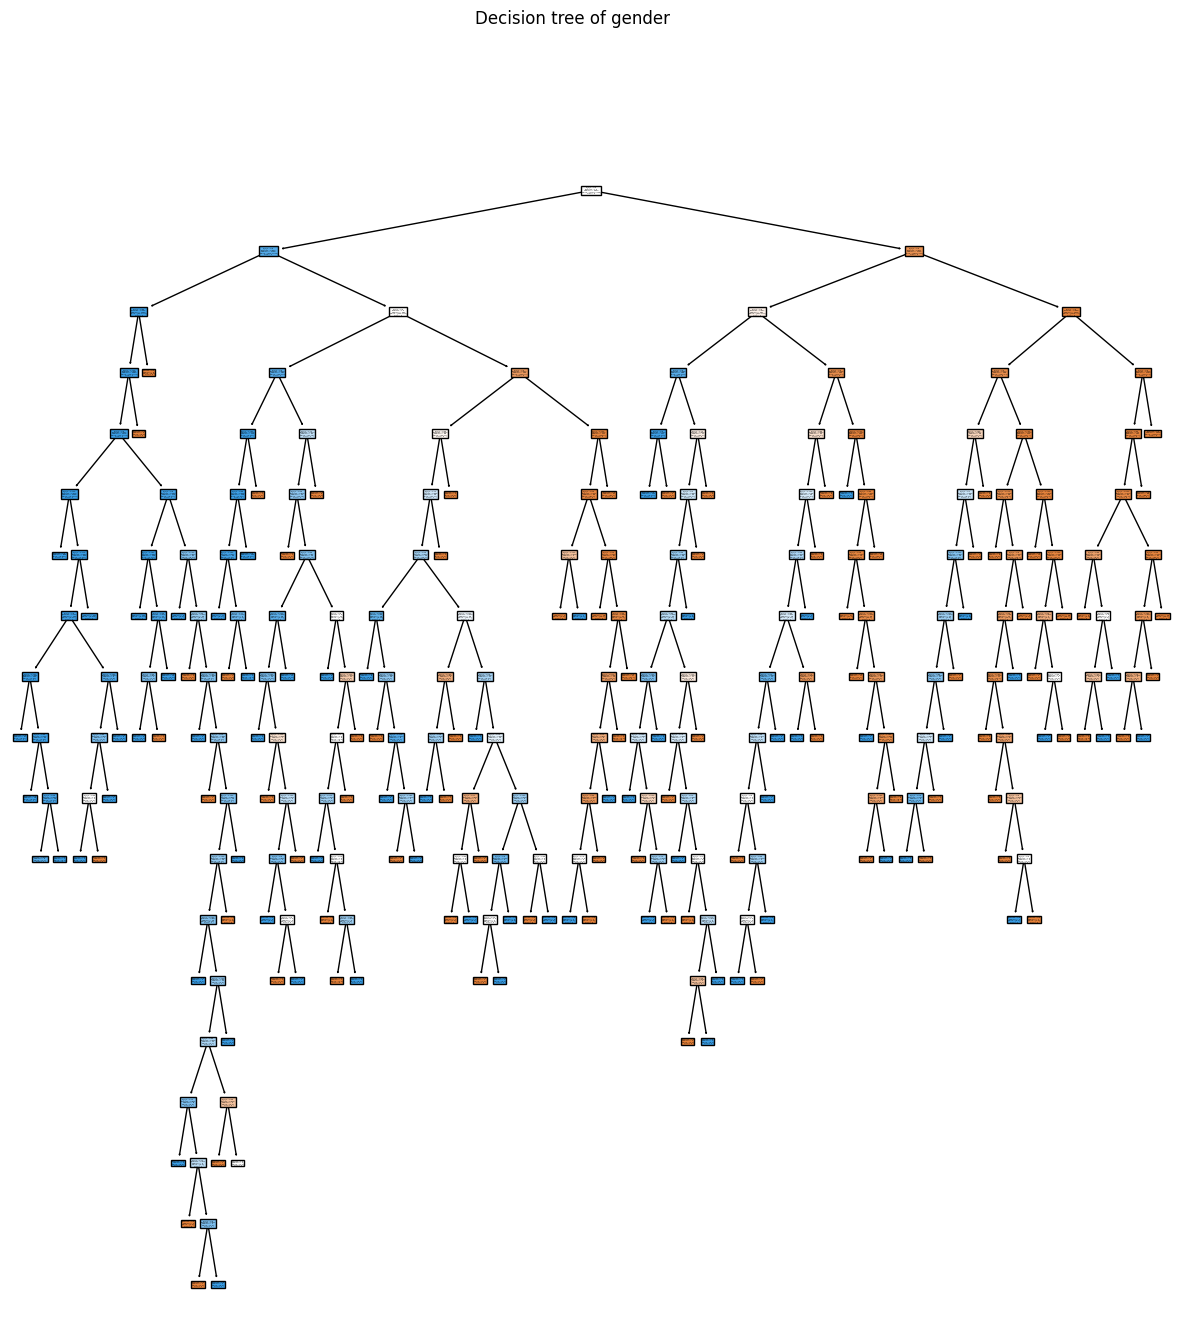

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, stratify=y)
#Split train-test data
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
#Build the Decision tree classifier
plt.figure(figsize =[15,15])
plt.suptitle("Decision tree of gender")
tree.plot_tree(clf, class_names=['0','1'] , filled=True )
plt.show()
#Plot the tree

In [ ]:
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

 Validate the classifier using confusion matrix

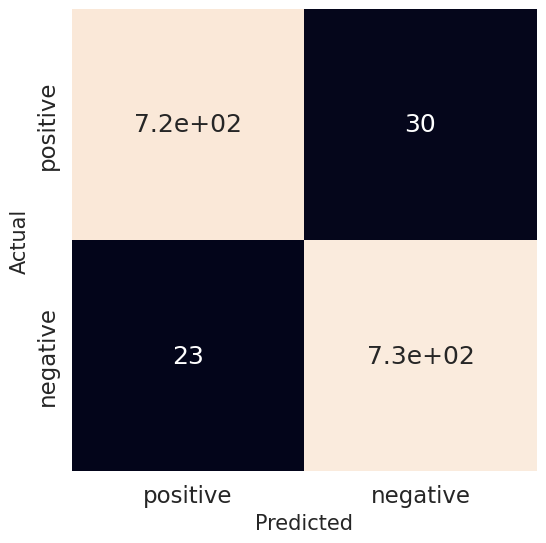

In [ ]:
predictdt_y = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,predictdt_y)
cf_matrix = pd.DataFrame(data = cf_matrix,
columns=['positive', 'negative'],
index=['positive', 'negative'])
#plot confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.5)
sns.heatmap(cf_matrix,annot=True, cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)
plt.show()



Based on the confusion matrix analysis, our classifier has demonstrated strong capability in recognizing tuples of different classes.

In [ ]:
data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1
5000,1,15.4,5.4,1,1,1,1,0


The last five data of the original data set are in the test data, so it is unknown data for the classifier trained with the train data.I will use data 4996 and data 5000 to make predictions to verify the reliability of the classifier

In [ ]:
first_pred = clf.predict([[1,13.6,5.1,0,0,0,0]])
last_pred = clf.predict([[1,15.4,5.4,1,1,1,1,]])
print(first_pred)
print(last_pred)

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The classification result is correct, proving the reliability of my classifier

# Clustering

Id number: 1 to 214 (removed from CSV file)

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps

Purpose: Use Kmean to cluster the glass dataset.

In [ ]:
import numpy
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ke-wen/ke-wen/main/dataset/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe']]
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
df = df.fillna(df.mean())
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


Using Kmeans for clustering with a predefined k of your choice.

Because we know that there are seven types of glass in this data, I my predefined k is 7

In [ ]:
km =KMeans(n_clusters =7)
km.fit(df)
df['cluster'] = km.labels_
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  cluster
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0        5
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0        0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0        0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0        0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0        0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...      ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0        2
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0        2
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0        2
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0        2
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0        2

[214 rows x 10 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(km.cluster_centers_)
print(km.labels_)

[[ 1.51731803e+00  1.31084426e+01  3.50696721e+00  1.36565574e+00
   7.28296721e+01  5.63360656e-01  8.40368852e+00  5.24590164e-03
   6.58196721e-02 -8.88178420e-16]
 [ 1.52013529e+00  1.31335294e+01  5.72941176e-01  1.48647059e+00
   7.30682353e+01  5.01764706e-01  1.10052941e+01  1.41176471e-02
   6.17647059e-02  4.11764706e+00]
 [ 1.51657593e+00  1.47159259e+01  2.27037037e-01  2.09888889e+00
   7.32070370e+01  7.96296296e-02  8.58148148e+00  1.01259259e+00
   1.44444444e-02  2.00000000e+00]
 [ 1.52826714e+00  1.18671429e+01  0.00000000e+00  1.21857143e+00
   7.16728571e+01  2.51428571e-01  1.43157143e+01  4.50000000e-01
   1.37142857e-01  1.00000000e+00]
 [ 1.51318500e+00  1.30100000e+01  0.00000000e+00  3.03000000e+00
   7.05900000e+01  6.21000000e+00  6.94500000e+00  0.00000000e+00
   0.00000000e+00  3.00000000e+00]
 [ 1.52126829e+00  1.38311429e+01  3.38685714e+00  1.04171429e+00
   7.18345714e+01  1.93714286e-01  9.55657143e+00  3.05714286e-02
   5.05714286e-02  5.00000000e+00

In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


When plotting clusters, you can only choose two attributes for the x and y axes. In this case, I have only chosen RI and K, so the centroids of the clusters in the visual representation might not appear to be at the center.

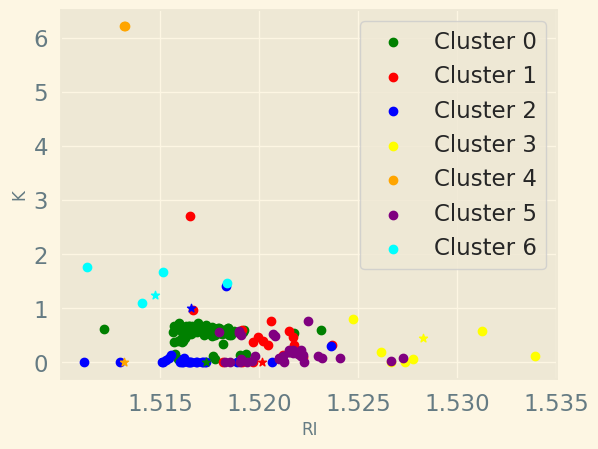

In [ ]:
df1 = df[df.cluster == 0] 

df2 = df[df.cluster == 1] 

df3 = df[df.cluster == 2] 

df4 = df[df.cluster == 3] 

df5 = df[df.cluster == 4] 

df6 = df[df.cluster == 5] 

df7 = df[df.cluster == 6] 

 
 

plt.scatter(df1.RI, df1.K, color='green', label='Cluster 0') 

plt.scatter(df2.RI, df2.K, color='red', label='Cluster 1') 

plt.scatter(df3.RI, df3.K, color='blue', label='Cluster 2') 

plt.scatter(df4.RI, df4.K, color='yellow', label='Cluster 3') 

plt.scatter(df5.RI, df5.K, color='orange', label='Cluster 4') 

plt.scatter(df6.RI, df6.K, color='purple', label='Cluster 5') 

plt.scatter(df7.RI, df7.K, color='cyan', label='Cluster 6') 

 
 

plt.xlabel('RI') 

plt.ylabel('K') 

 
 

plt.scatter(km.cluster_centers_[0][0], km.cluster_centers_[0][7], color='green', marker ='*') 

plt.scatter(km.cluster_centers_[1][0], km.cluster_centers_[1][7], color='red', marker ='*') 

plt.scatter(km.cluster_centers_[2][0], km.cluster_centers_[2][7], color='blue', marker ='*') 

plt.scatter(km.cluster_centers_[3][0], km.cluster_centers_[3][7], color='yellow', marker ='*') 

plt.scatter(km.cluster_centers_[4][0], km.cluster_centers_[4][7], color='orange', marker ='*') 

plt.scatter(km.cluster_centers_[5][0], km.cluster_centers_[5][7], color='purple', marker ='*') 

plt.scatter(km.cluster_centers_[6][0], km.cluster_centers_[6][7], color='cyan', marker ='*') 




plt.legend() 

plt.show() 
#plot the cluster

Identify Elbow point and the best number of cluster by sse

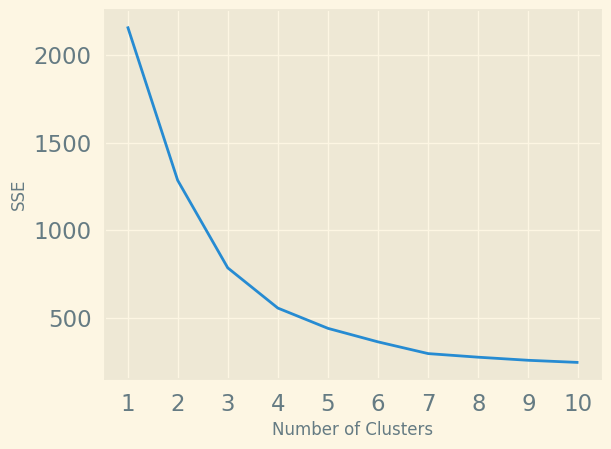

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, n_init= 10, max_iter = 200)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

plt.style.use("Solarize_Light2")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In the sse plot, the slope decreases the most is 3, so I consider 3 to be the Elbow point, and conclude that the optimal number of clusters is 3

Clustering again the dataset with the best number of clusters identified,which is 3,,and plot the clusters

In [ ]:
KMeans =KMeans(n_clusters =3)
KMeans.fit(df)
df['cluster'] = KMeans.labels_
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  cluster
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0        2
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0        0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0        0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0        0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0        0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...      ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0        1
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0        1
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0        1
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0        1
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0        1

[214 rows x 10 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(KMeans.cluster_centers_)
print(KMeans.labels_)

[[1.51731803e+00 1.31084426e+01 3.50696721e+00 1.36565574e+00
  7.28296721e+01 5.63360656e-01 8.40368852e+00 5.24590164e-03
  6.58196721e-02 2.88657986e-15]
 [1.51936706e+00 1.37974510e+01 3.11176471e-01 1.77392157e+00
  7.29501961e+01 2.43921569e-01 1.01764706e+01 6.02549020e-01
  4.70588235e-02 1.80392157e+00]
 [1.52023610e+00 1.38141463e+01 3.18951220e+00 1.27146341e+00
  7.17468293e+01 6.14634146e-01 9.08634146e+00 1.48536585e-01
  4.31707317e-02 5.04878049e+00]]
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 2 0 0 0 2 0 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


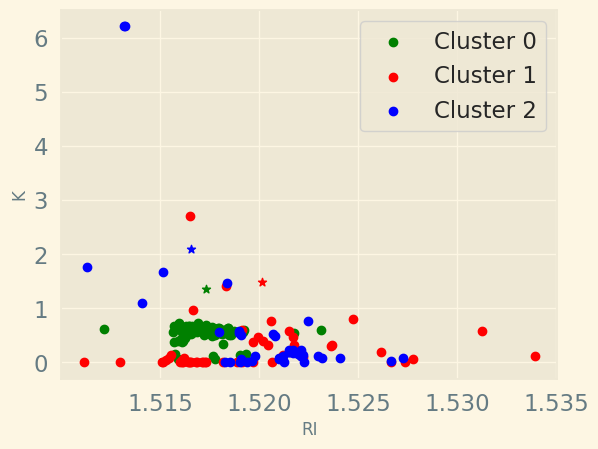

In [ ]:
df1 = df[df.cluster == 0] 

df2 = df[df.cluster == 1] 

df3 = df[df.cluster == 2] 

 
 
plt.scatter(df1.RI, df1.K, color='green', label='Cluster 0') 

plt.scatter(df2.RI, df2.K, color='red', label='Cluster 1') 

plt.scatter(df3.RI, df3.K, color='blue', label='Cluster 2') 

 

plt.xlabel('RI') 

plt.ylabel('K') 

 

plt.scatter(km.cluster_centers_[0][0], km.cluster_centers_[0][3], color='green', marker ='*') 

plt.scatter(km.cluster_centers_[1][0], km.cluster_centers_[1][3], color='red', marker ='*') 

plt.scatter(km.cluster_centers_[2][0], km.cluster_centers_[2][3], color='blue', marker ='*') 



plt.legend() 

plt.show() 
